In [3]:
import pandas as pd

pokemon = pd.read_csv("data/pokemon.csv")

In [5]:
pokemon

,Num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
147,148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
148,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


In [6]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Num        151 non-null    int64 
 1   Name       151 non-null    object
 2   Type 1     151 non-null    object
 3   Type 2     67 non-null     object
 4   Total      151 non-null    int64 
 5   HP         151 non-null    int64 
 6   Attack     151 non-null    int64 
 7   Defense    151 non-null    int64 
 8   Sp. Atk    151 non-null    int64 
 9   Sp. Def    151 non-null    int64 
 10  Speed      151 non-null    int64 
 11  Stage      151 non-null    int64 
 12  Legendary  151 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 14.4+ KB


In [7]:
pokemon.set_index("Name", inplace=True)

In [8]:
pokemon

,Num,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,2,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,3,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Dratini,147,Dragon,NaN,300,41,64,45,50,50,50,1,False
Dragonair,148,Dragon,NaN,420,61,84,65,70,70,70,2,False
Dragonite,149,Dragon,Flying,600,91,134,95,100,100,80,3,False


# 📌 공격력(Attack) TOP 10 분석 📍 Attack 기준 상위 10마리 포켓몬

In [14]:
top10 = pokemon.sort_values("Attack", ascending=False).head(10)

<Axes: title={'center': 'Top 10 Pokémon by Attack'}, xlabel='Name'>

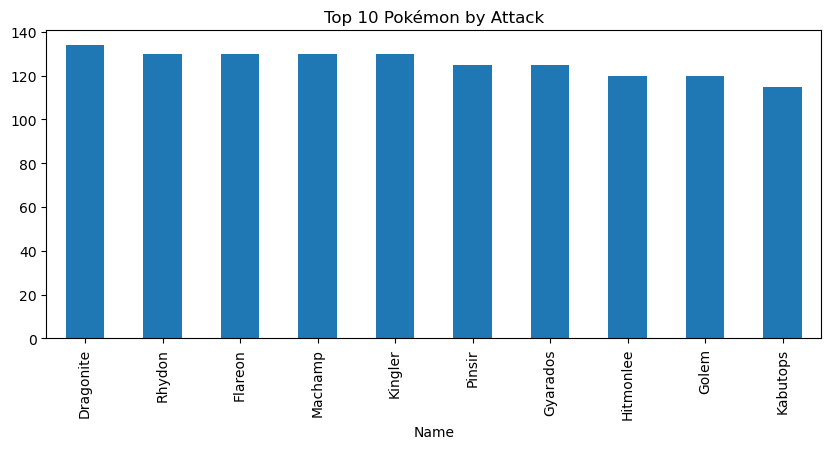

In [15]:
top10["Attack"].plot(kind="bar", title="Top 10 Pokémon by Attack", figsize=(10,4))

# 📌 속도(Speed) 기준 TOP 10 평균 Speed 분석

In [16]:
top10["Speed"].mean()

69.3

#  📌 Attack TOP 20 → 가장 흔한 Type 1 찾기

In [17]:
top20_attack = pokemon.sort_values("Attack", ascending=False).head(20)
top20_attack["Type 1"].value_counts()

Type 1
Fighting    4
Water       3
Fire        2
Bug         2
Rock        2
Normal      2
Dragon      1
Ground      1
Psychic     1
Grass       1
Poison      1
Name: count, dtype: int64

# 📌 물고기(fish-like) 포켓몬 분석

In [18]:
fish_pokemon = ["Magikarp", "Goldeen","Horsea", "Seaking", "Seadra","Gyarados"]

In [19]:
fish_df = pokemon.loc[fish_pokemon]
fish_df

,Num,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,,
Magikarp,129,Water,NaN,200,20,10,55,15,20,80,1,False
Goldeen,118,Water,NaN,320,45,67,60,35,50,63,1,False
Horsea,116,Water,NaN,295,30,40,70,70,25,60,1,False
Seaking,119,Water,NaN,450,80,92,65,65,80,68,2,False
Seadra,117,Water,NaN,440,55,65,95,95,45,85,2,False
Gyarados,130,Water,Flying,540,95,125,79,60,100,81,2,False


# 📌 Fish 포켓몬 Attack 값 시각화

<Axes: title={'center': 'Attack Stats of Fish-like Pokemon'}, xlabel='Name'>

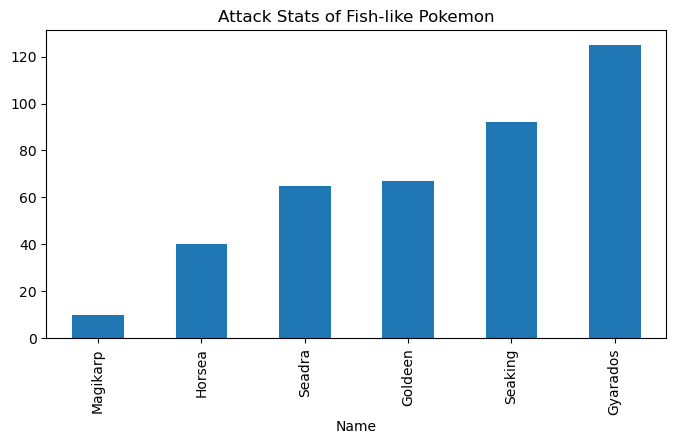

In [20]:
fish_df["Attack"].sort_values().plot(kind="bar", title="Attack Stats of Fish-like Pokemon", figsize=(8,4))

# 📌 Charizard ~ Charmeleon 데이터 특정 구간 조회 
### loc 활용

In [21]:
pokemon.sort_index(inplace=True)
pokemon.loc["Charizard":"Charmeleon"]

,Num,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,,
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,3,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,2,False


# 📌 30, 40, 50 행 번호 기준 특정 위치 조회
### iloc 활용

In [22]:
pokemon.iloc[[30, 40, 50]]

,Num,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,,
Eevee,133,Normal,NaN,325,55,55,50,45,65,55,1,False
Gengar,94,Ghost,Poison,500,60,65,60,130,75,110,3,False
Gyarados,130,Water,Flying,540,95,125,79,60,100,81,2,False


# 📌 결론 (Conclusion)

이번 분석을 통해 포켓몬의 능력치 패턴을 파악해보았다.

### 주요 인사이트:

- Attack 및 Speed 상위 포켓몬은 특정 타입에 집중되어 있다.
- 물고기 형태 포켓몬들은 Attack 차이가 매우 크며, 진화 후 성능이 크게 증가한다.
- Pandas의 정렬(sort), 인덱스 설정(set_index), 슬라이싱(loc/iloc) 기능만으로도 충분한 기초 분석 가능.